## Osnovni primeri Pandas

Ta zvezek vas bo popeljal skozi nekatere zelo osnovne koncepte Pandas. Začeli bomo z uvozom tipičnih knjižnic za podatkovno znanost:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serije

Serije so podobne seznamu ali 1D-tabeli, vendar imajo indeks. Vse operacije so poravnane glede na indeks.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Ena izmed pogostih uporab serij je **časovna serija**. Pri časovnih serijah ima indeks posebno strukturo - običajno obseg datumov ali časovnih žigov. Takšen indeks lahko ustvarimo z `pd.date_range`.

Recimo, da imamo serijo, ki prikazuje količino izdelkov, kupljenih vsak dan, in vemo, da vsako nedeljo potrebujemo en izdelek zase. Tukaj je prikazano, kako to modelirati z uporabo serij:


Length of index is 366


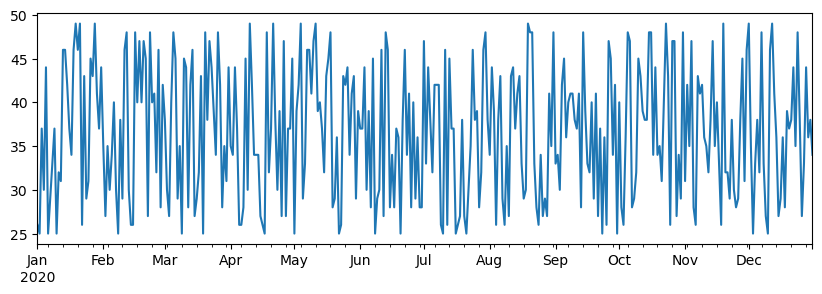

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Kot lahko vidite, imamo tukaj težave, ker se v tedenski seriji dnevi, ki niso omenjeni, štejejo za manjkajoče (`NaN`), in dodajanje `NaN` številu nam da `NaN`. Da bi dobili pravilen rezultat, moramo določiti `fill_value` pri seštevanju serij:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


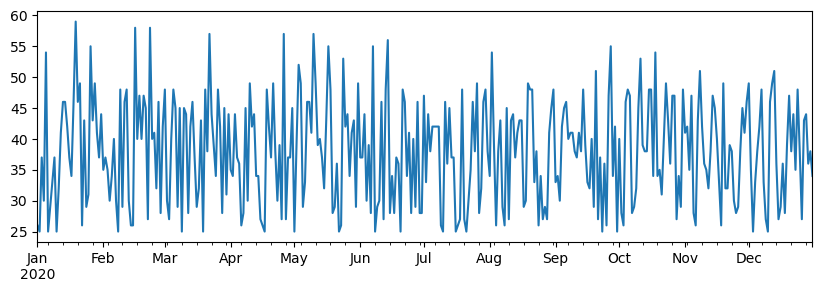

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

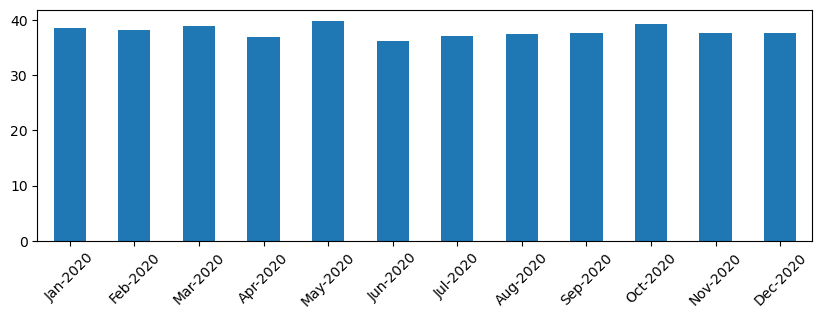

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame je v bistvu zbirka serij z enakim indeksom. Več serij lahko združimo v DataFrame. Glede na zgoraj definirani seriji `a` in `b`:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Prav tako lahko uporabimo Series kot stolpce in določimo imena stolpcev z uporabo slovarja:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Enak rezultat lahko dosežemo s transponiranjem (in nato preimenovanjem stolpcev, da ustrezajo prejšnjemu primeru):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Izbira stolpcev** iz DataFrame lahko izvedemo takole:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Izbira vrstic** na podlagi izraza za filtriranje:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Način delovanja je, da izraz `df['A']<5` vrne boolean serijo, ki označuje, ali je izraz `True` ali `False` za vsak element serije. Ko je serija uporabljena kot indeks, vrne podmnožico vrstic v DataFrame. Zato ni mogoče uporabiti poljubnega Python boolean izraza, na primer, zapis `df[df['A']>5 and df['A']<7]` bi bil napačen. Namesto tega morate uporabiti posebno operacijo `&` na boolean seriji:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Ustvarjanje novih izračunljivih stolpcev**. Z lahkoto lahko ustvarimo nove izračunljive stolpce za naš DataFrame z uporabo intuitivnih izrazov. Spodnja koda izračuna odstopanje A od njegove povprečne vrednosti.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Dejansko izračunavamo serijo in nato to serijo dodelimo levi strani, s čimer ustvarimo še en stolpec.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Izbira vrstic na podlagi številk** se lahko izvede z uporabo konstrukta `iloc`. Na primer, za izbiro prvih 5 vrstic iz DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Združevanje** se pogosto uporablja za dosego rezultata, podobnega *vrtilnim tabelam* v Excelu. Recimo, da želimo izračunati povprečno vrednost stolpca `A` za vsako dano število `LenB`. Nato lahko združimo naš DataFrame po `LenB` in pokličemo `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Če moramo izračunati povprečje in število elementov v skupini, lahko uporabimo bolj zapleteno funkcijo `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Tiskanje in risanje

Podatkovni znanstveniki pogosto raziskujejo podatke, zato je pomembno, da jih znajo vizualizirati. Ko je DataFrame velik, si pogosto želimo le zagotoviti, da vse delamo pravilno, tako da natisnemo prvih nekaj vrstic. To lahko storimo z uporabo `df.head()`. Če to izvajate v Jupyter Notebooku, bo DataFrame prikazan v lepi tabelarični obliki.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Videli smo tudi uporabo funkcije `plot` za vizualizacijo nekaterih stolpcev. Čeprav je `plot` zelo uporaben za številne naloge in podpira različne vrste grafov prek parametra `kind=`, lahko vedno uporabite osnovno knjižnico `matplotlib` za prikaz bolj zapletenih grafov. Podrobneje bomo obravnavali vizualizacijo podatkov v ločenih lekcijah tečaja.


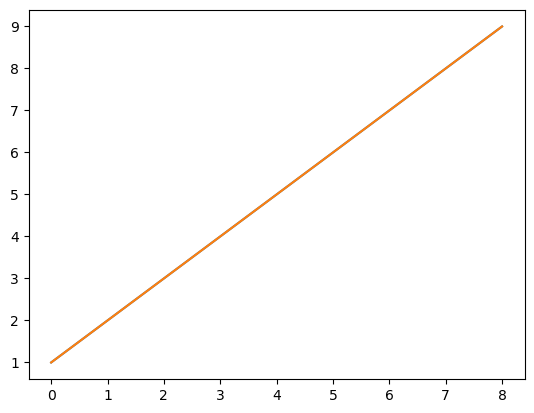

In [61]:
df['A'].plot()
plt.show()

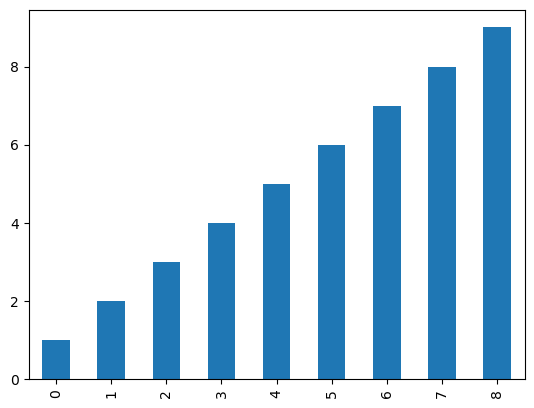

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ta pregled zajema najpomembnejše koncepte Pandas, vendar je knjižnica zelo obsežna in možnosti za njeno uporabo so skoraj neomejene! Zdaj pa uporabimo to znanje za reševanje specifičnega problema.



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za strojno prevajanje [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem izvirnem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo strokovno človeško prevajanje. Ne prevzemamo odgovornosti za morebitna nesporazumevanja ali napačne razlage, ki izhajajo iz uporabe tega prevoda.
